In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATA

In [106]:
df = pd.read_csv('hepatitis_csv.csv')

# BASIC DATA EXPLORATION

In [107]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [11]:
df.shape

(155, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [14]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


# HANDLING MISSING VALUES

In [79]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

### Replacing the rows with null values.
### Replacing with mean, if standard deviation is between -5 and +5
### Replacing with median otherwise.

In [108]:
columns = df.columns
for item in columns:
    if df[item].isnull().sum() != 0 and (df[item].dtype == 'int64'or df[item].dtype == 'float64'):
        if -5 < df[item].std() < 5:
            mean = df[item].mean()
            # print(f"replacing {item}, {mean}")
            df[item].replace(np.nan,mean,inplace=True)
        else:
            med = df[item].median()
            # print(f"replacing {item}, {med}")
            df[item].replace(np.nan,med,inplace=True)

### Removing the rows with null values of categorical columns

In [109]:
for item in columns:
    if df[item].isnull().sum() != 0 and (df[item].dtype == 'object'or df[item].dtype == 'bool'):
        df.dropna(subset=[item],axis=0,inplace=True)

In [82]:
df.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

### Checking if null values are removed

# HANDLING DUPLICATE RECORD

In [64]:
dups = df.duplicated()
dups.sum()

0

# EXPLORATORY ANALYSIS

### Checking the distribution of numerical data.

/home/jho/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensiona

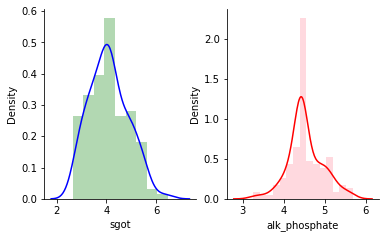

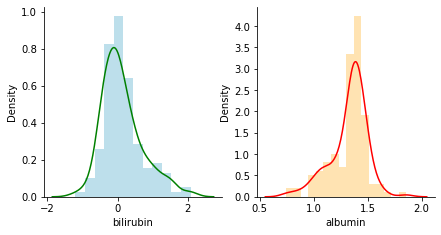

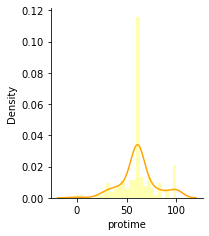

In [135]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(df['sgot'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(df['alk_phosphate'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})
sns.despine();

plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(df['bilirubin'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(df['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"orange","alpha":0.3})
sns.despine();

plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(df['protime'], 
             kde_kws={"color":"orange","lw":1.5,"alpha":0.8},
             hist_kws={"color":"yellow","alpha":0.3})
sns.despine();

### logarithmic transformation on data which are positively skewed.

In [117]:
df[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = df[['albumin','alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,0.000000,4.442651,2.890372,1.386294,61.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,-0.105361,4.905275,3.737670,1.252763,61.0,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,-0.356675,4.564348,3.465736,1.386294,61.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,0.000000,4.442651,5.298317,1.386294,61.0,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,-0.105361,4.553877,3.332205,1.386294,75.0,False,live


### Bivariate Analysis (Numerical Vs Numerical) 

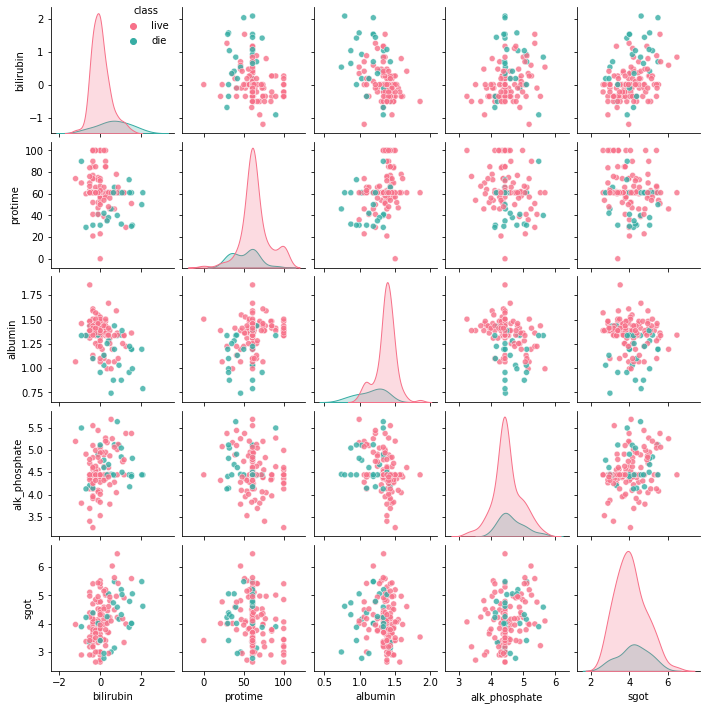

In [121]:
g = sns.pairplot(df, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

From the histograms we learn that the skewness present in our data was mainly fixed

### Bivariate Analysis (Categorical Vs Numerical) 

/home/jho/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jho/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jho/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jho/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jho/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.2% of 

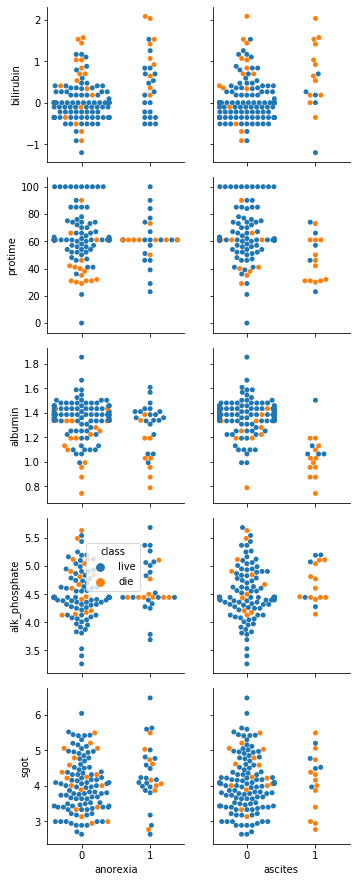

In [140]:
graph = sns.PairGrid(df,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 5)
graph.add_legend(frameon=True, bbox_to_anchor=(0.35, 0.35));

It is possible to observe that there is no difference in the variables plotted regarding the ANOREXIA status. 
On the other hand, we can see a trend that patients with Class "die' tend to have ascites. 
However, there is no differences in how the variables are expressed regarding ASCITES status.

### Correlation Analysis 

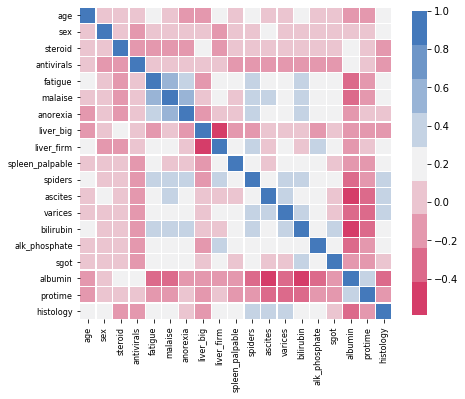

In [130]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']
df[categorical_variables] = df[categorical_variables].apply(lambda x : pd.factorize(x)[0])
corr = df.corr(method = 'pearson')
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(0, 250, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);


We can observe in the heatmap that some of the variables show a coefficient of ~0.4 or -0.2.
But most of them display a very low correlation coefficient.
There is no strong linear correlation between our variable.